# 9th of July, 2018
## Benjamin Adam Catching
## Andino Lab Rotation
## Poliovirus DIP Project

Today the two goals are to:  
* Begin the processing pipeline of mouse video  
    - Convert data from .h264 to .h5 (ask Tom if data can be directly converted)  
    - Extract characteristics from mice (look to the Kokel lab for what has been done)  
* Finalize analysis of CirSeq data  
    - Extract any useful mutants (filter the non-mutants from Friday's data)  
    - If any useful mutants exist, analysis

### Mouse Data Processing and Analysis

In [1]:
import numpy as np
import cv2
assert cv2.__version__[0] == '3'
import matplotlib.pyplot as plt
import glob
import skvideo.io
import h5py
import skimage.io
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [2]:
# Read in the converted .h264 -> .m4v, convert to array of frames
frames = []
cap = skvideo.io.vreader('../../data/Test3_2black_rr.m4v')

it = 0
while True:
    try:
        image = next(cap)
        frames.append(image)
        it += 1
        if (it % 100 == 0):
            print('Processed %d frames so far' % (it))
    except:
        break

Processed 100 frames so far
Processed 200 frames so far
Processed 300 frames so far
Processed 400 frames so far
Processed 500 frames so far
Processed 600 frames so far


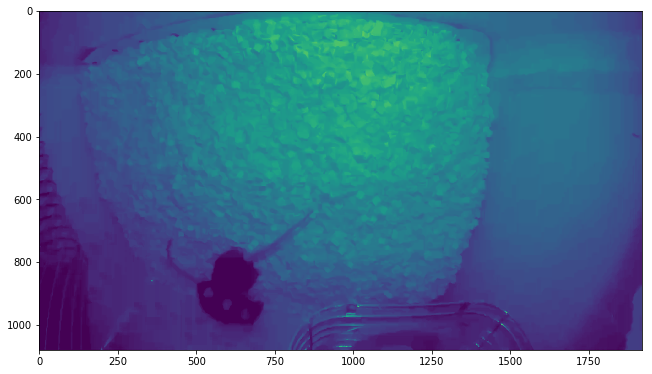

In [3]:
# Display the first frame
fig, ax = plt.subplots(1, 1, figsize=(10.80, 19.20))
plt.imshow(frames[0][:,:,2])
plt.show()

In [5]:
"""# Attempt to write the file to h5 format
with h5py.File('../../data/test3.hdf5','w') as h5File:
    h5File.create_dataset('camera1',data=frames,compression='gzip',compression_opts=9)"""

"# Attempt to write the file to h5 format\nwith h5py.File('../../data/test3.hdf5','w') as h5File:\n    h5File.create_dataset('camera1',data=frames,compression='gzip',compression_opts=9)"

In [4]:
gray = np.float32(frames[0])
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
plt.imshow(dst)

error: /Users/travis/miniconda3/conda-bld/opencv_1489542914304/work/opencv-3.1.0/modules/imgproc/src/corner.cpp:287: error: (-215) src.type() == CV_8UC1 || src.type() == CV_32FC1 in function cornerEigenValsVecs


In [5]:
# Read in the distortion image
# Read in the converted .h264 -> .m4v, convert to array of frames
test_frames = []
cap = skvideo.io.vreader('../../data/Distortion_test_4mice.m4v')

it = 0
while True:
    try:
        image = next(cap)
        test_frames.append(image)
        it += 1
        if (it % 100 == 0):
            print('Processed %d frames so far' % (it))
    except:
        break

Processed 100 frames so far


/Users/adam/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


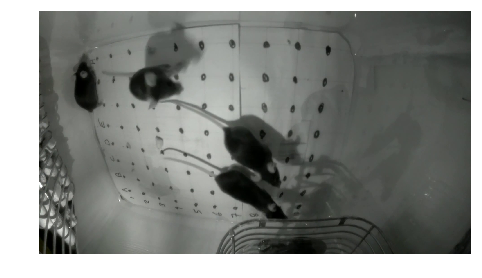

In [6]:
# Display the first frame
test_frame = test_frames[90]#[:, 0:500]
#fig, ax = plt.subplots(1, 1, figsize=(19.20, 10.80))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(test_frame)
#myFig = plt.figure()
plt.tight_layout()
plt.savefig('../../data/mouse_image_1.png', dpi=320)
plt.show()

In [7]:
# The location of the points are needed to generate the 
np_dot_list = np.array([[(403, 803), (380, 738), (352, 665), (328, 593), (308, 510), (288, 419), (266, 320), (256, 218)],
                        [(465, 812), (442, 754), (418, 682), (394, 612), (364, 518), (348, 424), (338, 310), (321, 202)],
                        [(534, 838), (506, 778), (482, 702), (460, 622), (440, 526), (418, 424), (406, 310), (400, 188)],
                        [(610, 848), (586, 787), (564, 712), (548, 628), (530, 529), (506, 430), (486, 304), (486, 178)],
                        [(696, 868), (680, 804), (664, 720), (649, 641), (632, 538), (616, 432), (610, 300), (606, 164)],
                        [(780, 873), (774, 812), (766, 734), (754, 650), (746, 542), (734, 428), (728, 295), (728, 151)],
                        [(872, 880), (873, 820), (870, 738), (864, 657), (866, 550), (863, 430), (860, 295), (860, 146)],
                        [(972, 882), (978, 824), (980, 744), (984, 654), (992, 548), (1002, 432), (1008, 298), (1014, 149)],
                        [(1066, 880), (1078, 820), (1092, 739), (1106, 664), (1117, 548), (1130, 436), (1142, 302), (1154, 158)],
                        [(1156, 878), (1176, 814), (1196, 738), (1212, 660), (1234, 553), (1256, 438), (1270, 314), (1288, 172)]])

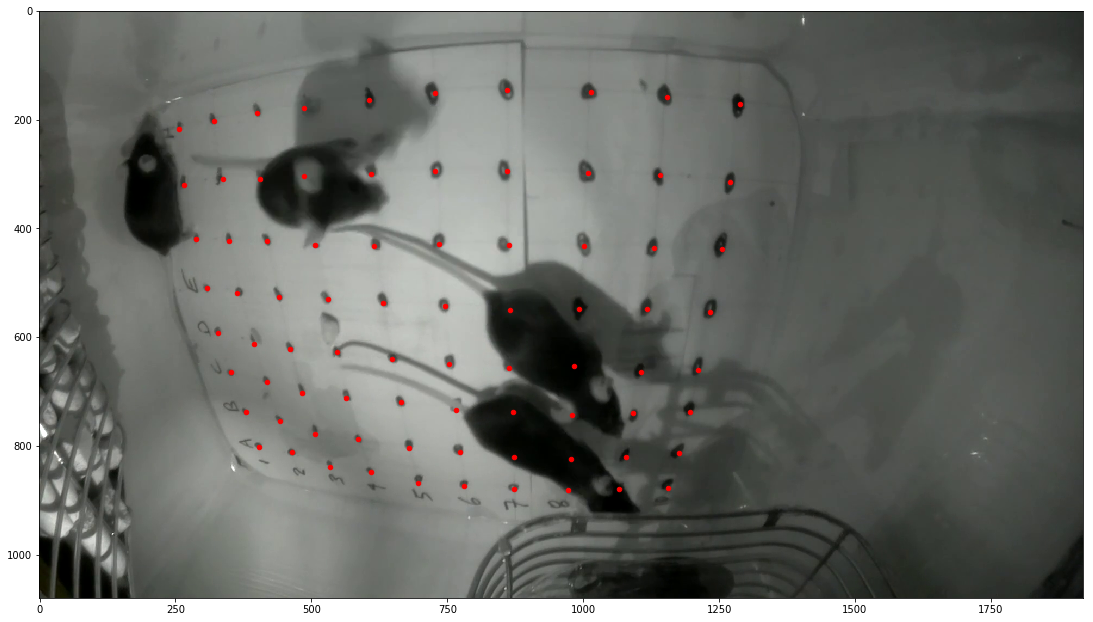

In [8]:
# Plot the points on the test image
fig, ax = plt.subplots(1, 1, figsize=((19.20, 10.80)))
plt.imshow(test_frame)
for row in np_dot_list:
    ax.scatter(row[:, 0], row[:, 1], c='r', s=20)
plt.show()

In [9]:
# Create a test checkerboard from the points

# Test seed point
test_i = 1
test_j = 0
i = test_i
j = test_j
test_x = [np_dot_list[i, j, 0], 
          np_dot_list[i, j+1, 0], 
          np_dot_list[i+1, j+1, 0], 
          np_dot_list[i+1, j, 0], 
          np_dot_list[i, j, 0]]

test_y = [np_dot_list[i, j, 1], 
          np_dot_list[i, j+1, 1], 
          np_dot_list[i+1, j+1, 1], 
          np_dot_list[i+1, j, 1], 
          np_dot_list[i, j, 1]]
print(test_x, test_y)

[465, 442, 506, 534, 465] [812, 754, 778, 838, 812]


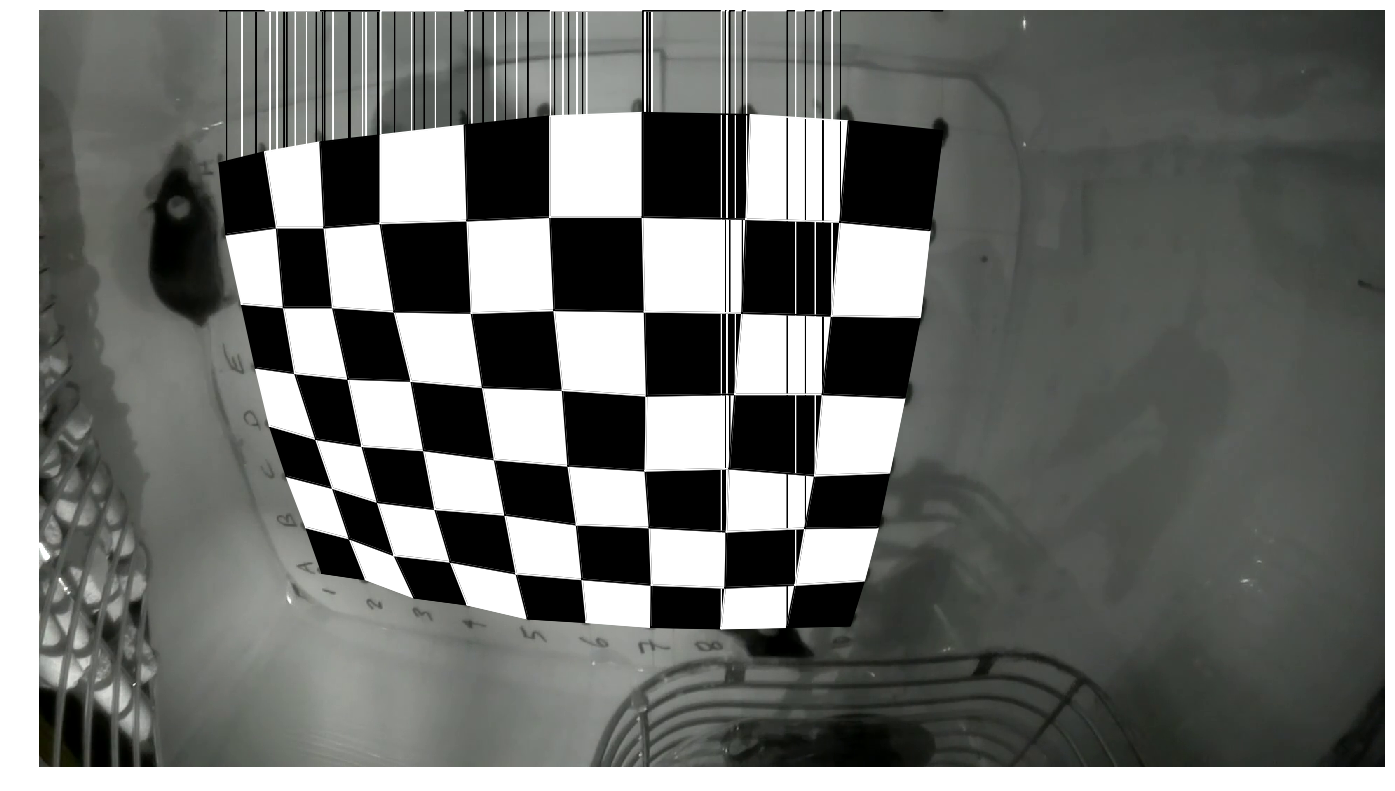

In [10]:
# Plot the points on the test image
fig, ax = plt.subplots(1, 1, figsize=((19.20, 10.80)))
plt.imshow(test_frame)
ax = plt.Axes(fig, [0., 0., 0, 0])
ptchs = []
for i in range(9):
    for j in range(7):
        test_x = [np_dot_list[i, j, 0],
                  np_dot_list[i, j+1, 0], 
                  np_dot_list[i+1, j+1, 0], 
                  np_dot_list[i+1, j, 0], 
                  np_dot_list[i, j, 0]]

        test_y = [np_dot_list[i, j, 1], 
                  np_dot_list[i, j+1, 1], 
                  np_dot_list[i+1, j+1, 1], 
                  np_dot_list[i+1, j, 1], 
                  np_dot_list[i, j, 1]]
        if (i+j) % 2 == 0:
            color='black'
        else:
            color='white'
        plt.plot(test_x, test_y, color=color)
        plt.fill_between(test_x, test_y, color=color)
"""        ptchs.append(Polygon(coords, facecolor='black', edgecolor='black'))
ax.add_collection(PatchCollection(ptchs))"""
plt.tight_layout(pad=0)
plt.axis('off')
plt.savefig('../../data/mouse_calibration_image.png', dpi=100, pad_inches=0.0, bbox_inches='tight')
plt.show()

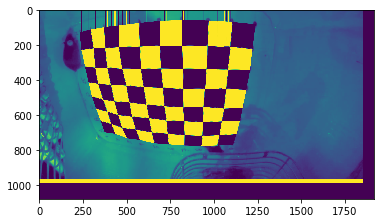

In [11]:
test = '../../data/mouse_calibration_image_1.png'
test_image = skimage.io.imread(test)
plt.imshow(test_image[:, :, 2])
plt.show()

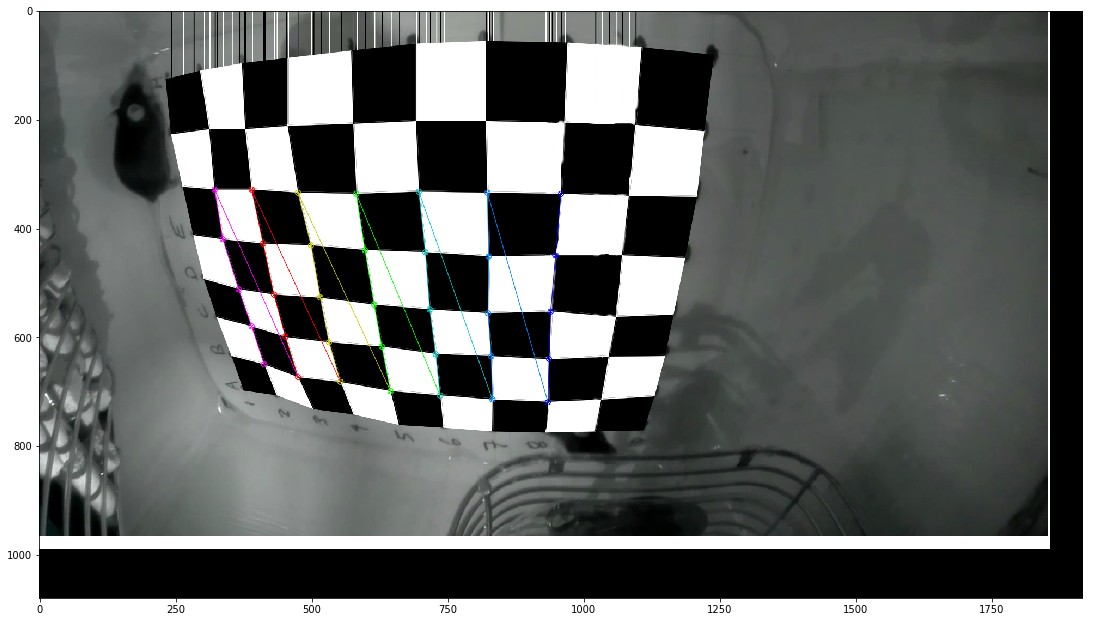

In [12]:
import numpy as np
import cv2
import glob

fig, ax = plt.subplots(1, 1, figsize=(19.20, 10.80))
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((5*7,3), np.float32)
objp[:,:2] = np.mgrid[0:5,0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

fname = '../../data/mouse_calibration_image_1.png'

img = cv2.imread(fname)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (5,7),None)

# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)

    corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    imgpoints.append(corners2)

    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, (5,7), corners2,ret)
    plt.imshow(img)
    plt.show()
#cv2.destroyAllWindows()

In [13]:
ret

True

In [14]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print(dist)
new_mtx = np.array([[360.0, 0.0, 910.0],
          [0.0, 360.0, 540.0],
          [0.0, 0.0, 1.0]])
dist = np.array([0.04316271, -0.02774814, -0.03620881, 0.01153531, 0.00304967])
new_dist = np.array([0.1, -.01, 0, 0,0.01])

[[ 0.04316271 -0.02774814 -0.03620881  0.01153531  0.00304967]]


In [15]:
img = frames[0]
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(new_mtx,new_dist,(w,h),1,(w,h))

In [16]:
# undistort
dst = cv2.undistort(img, new_mtx, new_dist, None, newcameramtx)

# crop the image
"""x,y,w,h = roi
dst = dst[y:y+h, x:x+w]"""
cv2.imwrite('../..data/corrected.png',dst)

False

In [17]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(new_mtx,new_dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
"""x,y,w,h = roi
dst = dst[y:y+h, x:x+w]"""
cv2.imwrite('../../data/calibresult.png',dst)


True

In [214]:
def undistort(img):

    h,w = img.shape[:2]

    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

    return undistorted_img

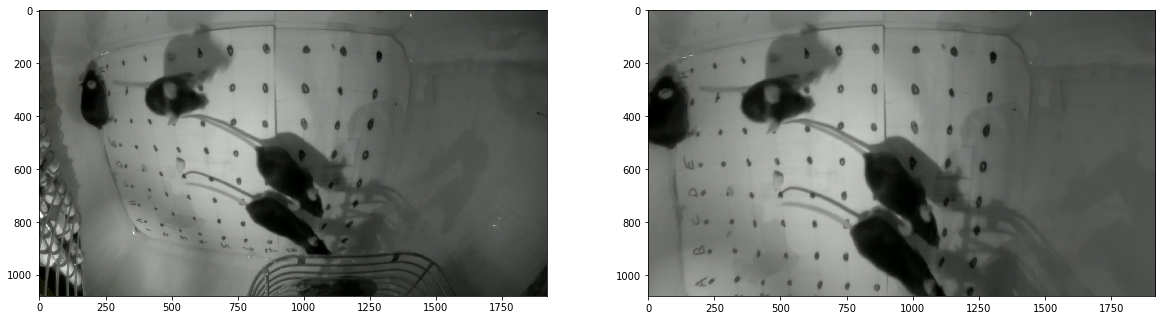

In [238]:
K = np.array([[1000.0, 0.0, 910.0],
          [0., 1000.0, 100.0],
          [0.0, 0.0, 1.0]])
D = np.array([np.array([[0.00001], [0.31307765215775184], [-0.4104704724832258], [0.15343014605793324]])])
DIM=(1917, 1079)
undisimg = undistort(test_frames[90])
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(test_frames[90])
ax[1].imshow(undisimg)
plt.show()

In [243]:
# Process the list of images to create a new somewhat less distorted series of images
undistorted_images = []
for frame in test_frames:
    new_frame = undistort(frame)
    undistorted_images.append(new_frame)

In [244]:
# Create somewhat corrected video
skvideo.io.vwrite("../../data/corrected_test_video.m4v", undistorted_images)